In [1]:
import pandas as pd
import numpy as np      
import matplotlib.pyplot as plt 
import seaborn as sns   
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import pickle




In [2]:
# !pip install prophet

Load Walmart dataset

In [3]:
df= pd.read_csv('E:\israa\ITI 9 Months\Time Series\Project\data\project_dataset.csv')

Filter data for Department 6

In [4]:
dept_6_df = df[df['Dept'] == 6]

Save to new CSV file

In [5]:
dept_6_df.to_csv('E:\israa\ITI 9 Months\Time Series\Project\data\walmart_dept6_sales.csv', index=False)

In [6]:
dept_6_df.head()

,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
71,2010-02-05,0,6.0,5749.03,42.31,2.572,211.096358,8.106
84,2010-02-12,1,6.0,9135.00,38.51,2.548,211.242170,8.106
153,2010-02-19,0,6.0,6060.26,39.93,2.514,211.289143,8.106
233,2010-02-26,0,6.0,5244.56,46.63,2.561,211.319643,8.106
304,2010-03-05,0,6.0,4221.25,46.50,2.625,211.350143,8.106


Load the filtered department 6 data

In [7]:
dept_6_df = pd.read_csv('E:\israa\ITI 9 Months\Time Series\Project\data\walmart_dept6_sales.csv')

In [8]:
dept_6_df.head()

,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,2010-02-05,0,6.0,5749.03,42.31,2.572,211.096358,8.106
1,2010-02-12,1,6.0,9135.00,38.51,2.548,211.242170,8.106
2,2010-02-19,0,6.0,6060.26,39.93,2.514,211.289143,8.106
3,2010-02-26,0,6.0,5244.56,46.63,2.561,211.319643,8.106
4,2010-03-05,0,6.0,4221.25,46.50,2.625,211.350143,8.106


In [9]:
dept_6_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          143 non-null    object 
 1   IsHoliday     143 non-null    int64  
 2   Dept          143 non-null    float64
 3   Weekly_Sales  143 non-null    float64
 4   Temperature   143 non-null    float64
 5   Fuel_Price    143 non-null    float64
 6   CPI           143 non-null    float64
 7   Unemployment  143 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 9.1+ KB


In [10]:
dept_6_df.isnull().sum()

Date            0
IsHoliday       0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [11]:
dept_6_df.shape

(143, 8)

In [12]:
dept_6_df.duplicated().sum()

0

Convert 'Date' column to datetime


In [13]:
dept_6_df['Date'] = pd.to_datetime(dept_6_df['Date'])

In [14]:
#show the first 5 rows of the 'Date' column
dept_6_df['Date'].head(5)

0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: Date, dtype: datetime64[ns]

In [15]:
#show the last 5 rows of the 'Date' column
dept_6_df['Date'].tail(5)

138   2012-09-28
139   2012-10-05
140   2012-10-12
141   2012-10-19
142   2012-10-26
Name: Date, dtype: datetime64[ns]

Sort by date

In [16]:
dept_6_df = dept_6_df.sort_values('Date').reset_index(drop=True)

In [17]:
print(dept_6_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          143 non-null    datetime64[ns]
 1   IsHoliday     143 non-null    int64         
 2   Dept          143 non-null    float64       
 3   Weekly_Sales  143 non-null    float64       
 4   Temperature   143 non-null    float64       
 5   Fuel_Price    143 non-null    float64       
 6   CPI           143 non-null    float64       
 7   Unemployment  143 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 9.1 KB
None


In [18]:
dept_6_df.head()

,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,2010-02-05,0,6.0,5749.03,42.31,2.572,211.096358,8.106
1,2010-02-12,1,6.0,9135.00,38.51,2.548,211.242170,8.106
2,2010-02-19,0,6.0,6060.26,39.93,2.514,211.289143,8.106
3,2010-02-26,0,6.0,5244.56,46.63,2.561,211.319643,8.106
4,2010-03-05,0,6.0,4221.25,46.50,2.625,211.350143,8.106


In [19]:
dept_6_df.describe()

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.069930,6.0,4801.780140,68.306783,3.219699,215.996892,7.610420
std,0.255926,0.0,3317.432691,14.250486,0.427313,4.350890,0.383749
min,0.000000,6.0,-139.650000,35.400000,2.514000,210.337426,6.573000
25%,0.000000,6.0,3364.800000,58.265000,2.764500,211.549277,7.348000
50%,0.000000,6.0,4132.610000,69.640000,3.290000,215.459905,7.787000
75%,0.000000,6.0,5022.410000,80.485000,3.594000,220.531330,7.838000
max,1.000000,6.0,28497.520000,91.650000,3.907000,223.444251,8.106000


In [20]:
print(dept_6_df['IsHoliday'].unique())


[0 1]


In [21]:
print(dept_6_df['Temperature'].unique())


[42.31 38.51 39.93 46.63 46.5  57.79 54.58 51.45 62.27 65.86 66.32 64.84
 67.41 72.55 74.78 76.44 80.44 80.69 80.43 84.11 84.34 80.91 80.48 83.15
 83.36 81.84 87.16 87.   86.65 85.22 81.21 78.69 82.11 80.94 71.89 63.93
 67.18 69.86 69.64 58.74 59.61 51.41 64.52 49.27 46.33 49.84 52.33 48.43
 48.27 35.4  44.04 43.83 42.27 36.39 57.36 62.9  59.58 53.56 62.76 69.97
 59.17 67.84 71.27 72.99 72.03 64.61 75.64 67.63 77.72 83.   83.13 86.41
 83.58 85.55 85.83 88.54 85.77 86.83 91.65 90.76 89.94 87.96 87.83 76.
 79.94 75.8  79.69 69.31 71.74 63.71 66.57 54.98 59.11 62.25 60.14 48.91
 43.93 51.63 47.96 44.55 49.01 48.53 54.11 54.26 56.55 48.02 45.32 57.25
 60.96 58.76 64.74 65.93 67.61 70.43 69.07 66.76 67.23 75.55 73.77 70.33
 77.22 77.95 78.3  79.35 78.39 84.88 81.57 77.12 80.42 82.66 86.11 85.05
 84.85 77.66 80.49 83.96 74.97 69.87 76.08 68.55 62.99 67.97 69.16]


In [22]:
print(dept_6_df['Fuel_Price'].unique())


[2.572 2.548 2.514 2.561 2.625 2.667 2.72  2.732 2.719 2.77  2.808 2.795
 2.78  2.835 2.854 2.826 2.759 2.705 2.668 2.637 2.653 2.669 2.642 2.623
 2.608 2.64  2.627 2.692 2.664 2.619 2.577 2.565 2.582 2.624 2.603 2.633
 2.725 2.716 2.689 2.728 2.771 2.735 2.708 2.843 2.869 2.886 2.943 2.976
 2.983 3.016 3.01  2.989 3.022 3.045 3.065 3.288 3.459 3.488 3.473 3.524
 3.622 3.743 3.807 3.81  3.906 3.899 3.907 3.786 3.699 3.648 3.637 3.594
 3.48  3.575 3.651 3.682 3.684 3.638 3.554 3.523 3.533 3.546 3.526 3.467
 3.355 3.285 3.274 3.353 3.372 3.332 3.297 3.308 3.236 3.172 3.158 3.159
 3.112 3.129 3.157 3.261 3.268 3.29  3.36  3.409 3.51  3.555 3.63  3.669
 3.734 3.787 3.845 3.891 3.877 3.814 3.749 3.688 3.561 3.501 3.452 3.393
 3.346 3.286 3.227 3.256 3.311 3.407 3.417 3.494 3.571 3.62  3.73  3.717
 3.721 3.666 3.617 3.601 3.506]


In [23]:
# dept_6_df.set_index('Date', inplace=True)


In [24]:
def Sesson(quarter):
    if quarter ==1:
        return 'Winter'
    elif quarter == 2:
        return 'Spring'
    elif quarter == 3:
        return 'Summer'
    else:
        return 'Fall'


In [25]:
dept_6_df['Year'] = dept_6_df['Date'].dt.year 
dept_6_df['Season'] = dept_6_df['Date'].dt.quarter.apply(Sesson) 
dept_6_df['Month'] = dept_6_df['Date'].dt.month_name() 
dept_6_df['Day_Of_Week'] = dept_6_df['Date'].dt.day_name()
dept_6_df.head(5)

,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Year,Season,Month,Day_Of_Week
0,2010-02-05,0,6.0,5749.03,42.31,2.572,211.096358,8.106,2010,Winter,February,Friday
1,2010-02-12,1,6.0,9135.00,38.51,2.548,211.242170,8.106,2010,Winter,February,Friday
2,2010-02-19,0,6.0,6060.26,39.93,2.514,211.289143,8.106,2010,Winter,February,Friday
3,2010-02-26,0,6.0,5244.56,46.63,2.561,211.319643,8.106,2010,Winter,February,Friday
4,2010-03-05,0,6.0,4221.25,46.50,2.625,211.350143,8.106,2010,Winter,March,Friday


In [26]:
print(dept_6_df['Season'].unique())


['Winter' 'Spring' 'Summer' 'Fall']


In [27]:
print(dept_6_df['Month'].unique())


['February' 'March' 'April' 'May' 'June' 'July' 'August' 'September'
 'October' 'November' 'December' 'January']


In [28]:
print(dept_6_df['Day_Of_Week'].unique())


['Friday']


Note

There are 4 holiday values such as;

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13/


In [29]:
# Super bowl dates in train set
dept_6_df.loc[(dept_6_df['Date'] == '2010-02-12')|(dept_6_df['Date'] == '2011-02-11')|(dept_6_df['Date'] == '2012-02-10'),'Super_Bowl'] = True
dept_6_df.loc[(dept_6_df['Date'] != '2010-02-12')&(dept_6_df['Date'] != '2011-02-11')&(dept_6_df['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [30]:
# Labor day dates in train set
dept_6_df.loc[(dept_6_df['Date'] == '2010-09-10')|(dept_6_df['Date'] == '2011-09-09')|(dept_6_df['Date'] == '2012-09-07'),'Labor_Day'] = True
dept_6_df.loc[(dept_6_df['Date'] != '2010-09-10')&(dept_6_df['Date'] != '2011-09-09')&(dept_6_df['Date'] != '2012-09-07'),'Labor_Day'] = False

In [31]:
# Thanksgiving dates in train set
dept_6_df.loc[(dept_6_df['Date'] == '2010-11-26')|(dept_6_df['Date'] == '2011-11-25'),'Thanksgiving'] = True
dept_6_df.loc[(dept_6_df['Date'] != '2010-11-26')&(dept_6_df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [32]:
#Christmas dates in train set
dept_6_df.loc[(dept_6_df['Date'] == '2010-12-31')|(dept_6_df['Date'] == '2011-12-30'),'Christmas'] = True
dept_6_df.loc[(dept_6_df['Date'] != '2010-12-31')&(dept_6_df['Date'] != '2011-12-30'),'Christmas'] = False

<AxesSubplot:xlabel='Christmas', ylabel='Weekly_Sales'>

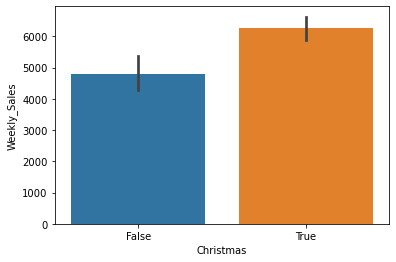

In [33]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=dept_6_df) # Christmas holiday vs not-Christmas


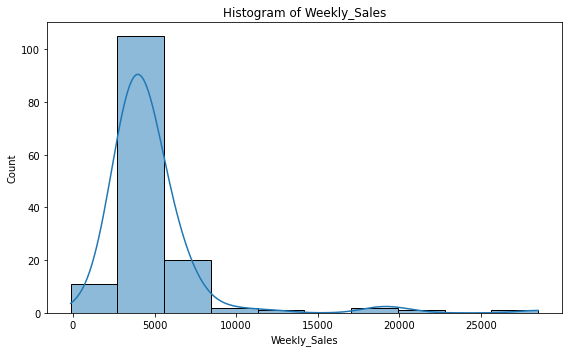

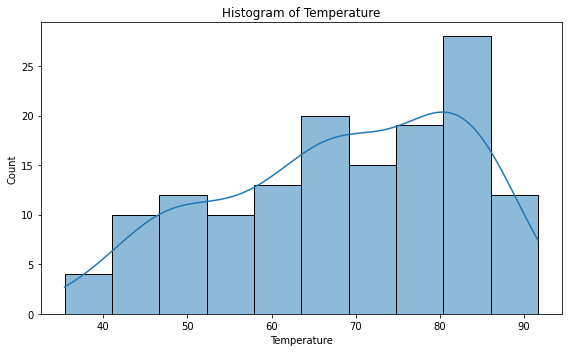

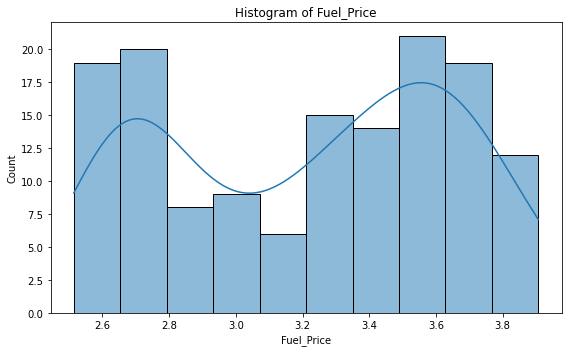

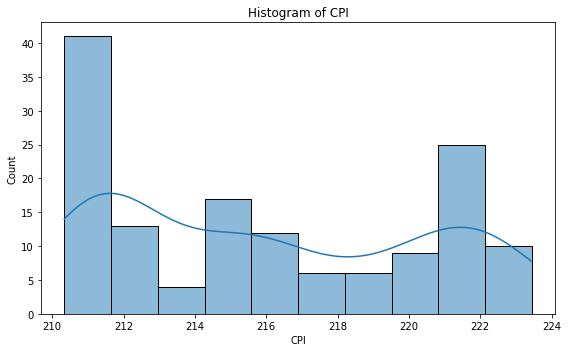

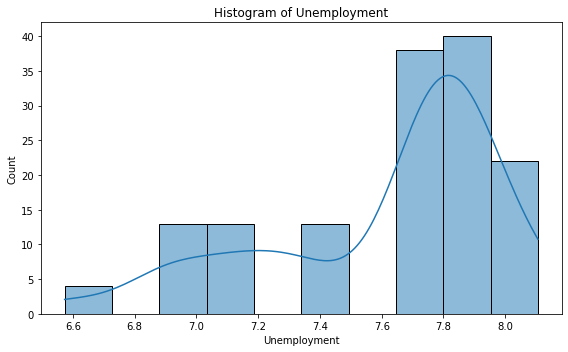

In [34]:
features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

for column in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=dept_6_df, x=column, kde=True, bins=10)
    plt.title(f'Histogram of {column}')
    plt.tight_layout()
    plt.show()

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

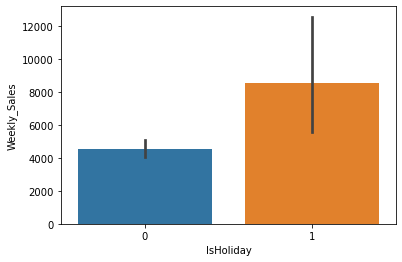

In [35]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=dept_6_df)


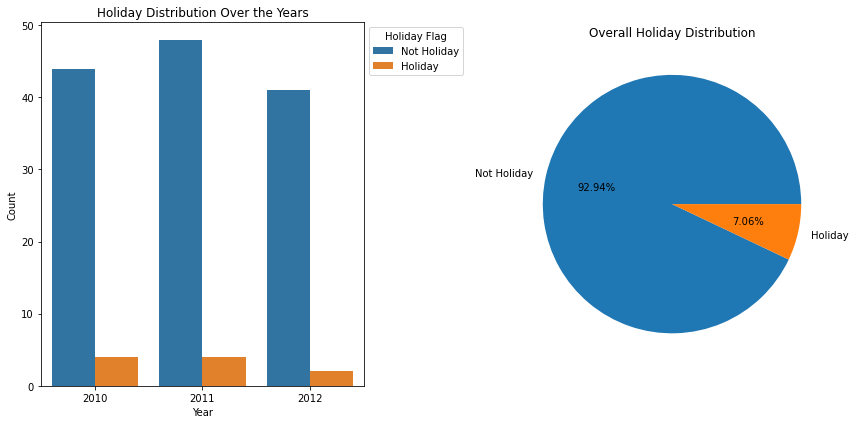

In [36]:
# Group by year and holiday_flag to get counts
holiday_counts = dept_6_df.groupby(['Year', 'IsHoliday']).size().unstack(fill_value=0).reset_index()

# Melt DataFrame to long format
holiday_counts_melted = pd.melt(holiday_counts, id_vars='Year', var_name='Holiday Flag', value_name='Count')

# Plot using Seaborn
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot
sns.barplot(data=holiday_counts_melted, x='Year', y='Count', hue='Holiday Flag', ax=ax[0])
ax[0].set_title('Holiday Distribution Over the Years')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Count')

# Get legend handles
handles, _ = ax[0].get_legend_handles_labels()

ax[0].legend(handles=handles, labels=['Not Holiday', 'Holiday'], title='Holiday Flag', loc='upper left', bbox_to_anchor=(1, 1))

ax[1].pie(df['IsHoliday'].value_counts().values, labels=['Not Holiday', 'Holiday'], autopct='%1.2f%%')
ax[1].set_title('Overall Holiday Distribution')

plt.tight_layout()
plt.show()

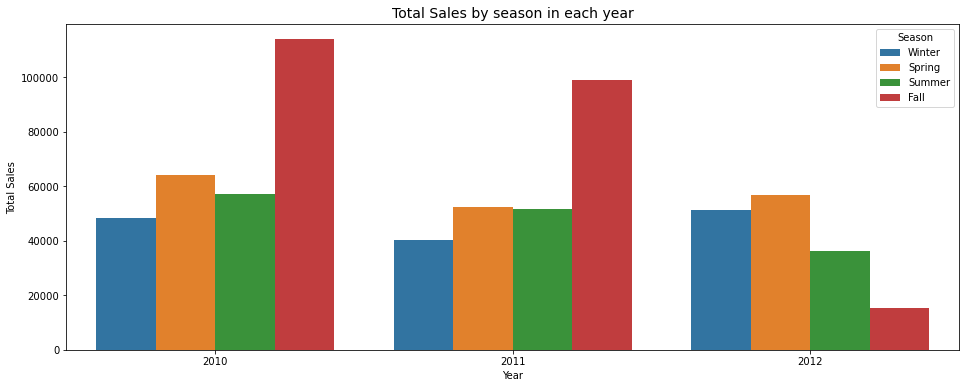

In [37]:
plt.figure(figsize = (16, 6))
sns.barplot(data = dept_6_df,
           x = 'Year',
           y = 'Weekly_Sales',
           hue = 'Season',
           estimator = np.sum,
           ci = False)

plt.title('Total Sales by season in each year', size = 14)
plt.xlabel('Year', size = 10)
plt.ylabel('Total Sales', size = 10)
plt.show()

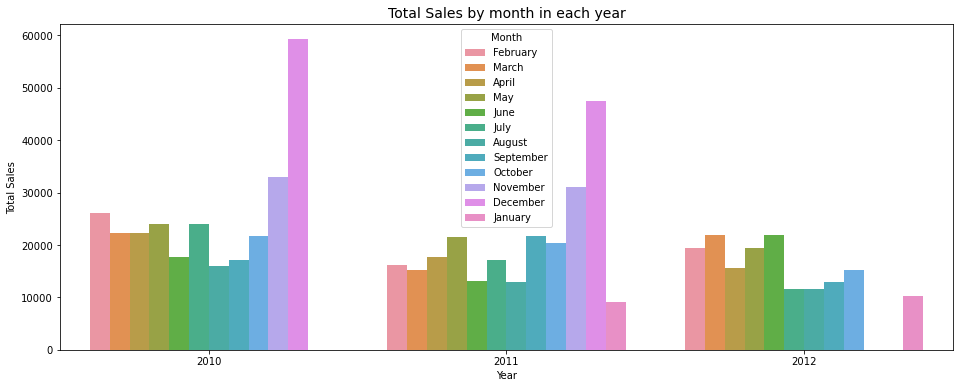

In [38]:
plt.figure(figsize = (16, 6))
sns.barplot(data = dept_6_df,
           x = 'Year',
           y = 'Weekly_Sales',
           hue = 'Month',
           estimator = np.sum,
           ci = False)

plt.title('Total Sales by month in each year', size = 14)
plt.xlabel('Year', size = 10)
plt.ylabel('Total Sales', size = 10)
plt.show()

In [39]:
df_1=dept_6_df.groupby(by=['Year'])['Weekly_Sales'].agg('sum').to_frame('Total Sales').reset_index()
df_1['rank year wise']=df_1.groupby(by=['Year'])['Total Sales'].rank(method='dense',ascending=False)
df_1[df_1['rank year wise']==1].reset_index()[['Year','Total Sales']]

,Year,Total Sales
0,2010,283502.81
1,2011,243433.96
2,2012,159717.79


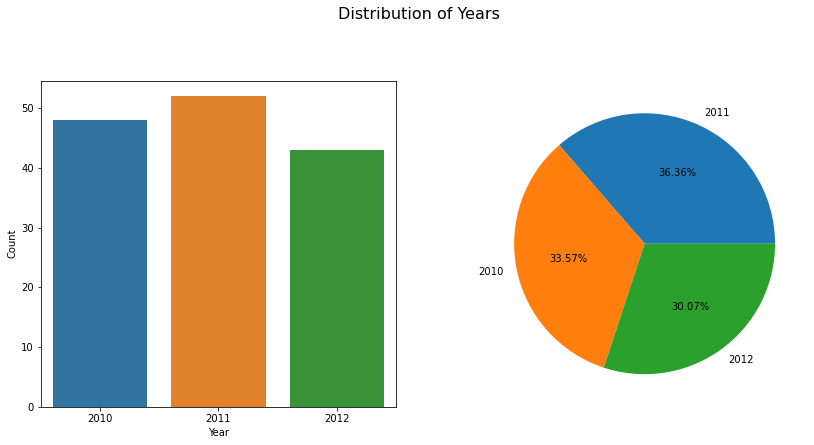

In [40]:
# Calculate the count of each year
year_counts = dept_6_df['Year'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Countplot for the distribution of years
sns.countplot(data=dept_6_df, x='Year', ax=ax[0])
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Count')

# Pie chart for the distribution of years
ax[1].pie(year_counts.values, labels=year_counts.index, autopct='%1.2f%%')
plt.suptitle('Distribution of Years', fontsize=16, y=1.05)
plt.show()

In [41]:
pd.pivot_table(data = dept_6_df,
              index = 'Year',
              columns = 'Season',
              values = 'Weekly_Sales',
              aggfunc = 'sum')

Season,Fall,Spring,Summer,Winter
Year,,,,
2010,113991.70,63993.04,57114.59,48403.48
2011,98881.32,52396.26,51745.61,40410.77
2012,15161.07,56838.51,36237.12,51481.09


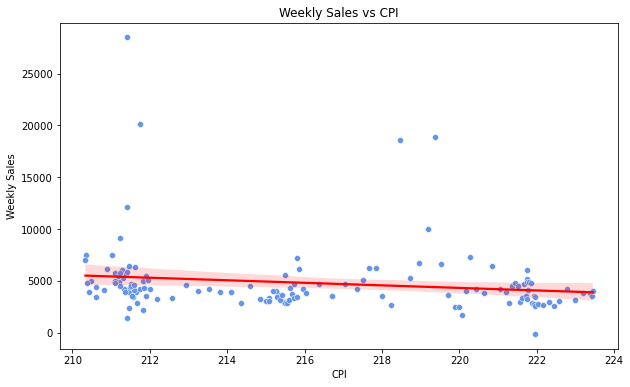

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=dept_6_df, color='cornflowerblue')
sns.regplot(x='CPI', y='Weekly_Sales', data=dept_6_df, scatter=False, color='red')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs CPI')
plt.show()

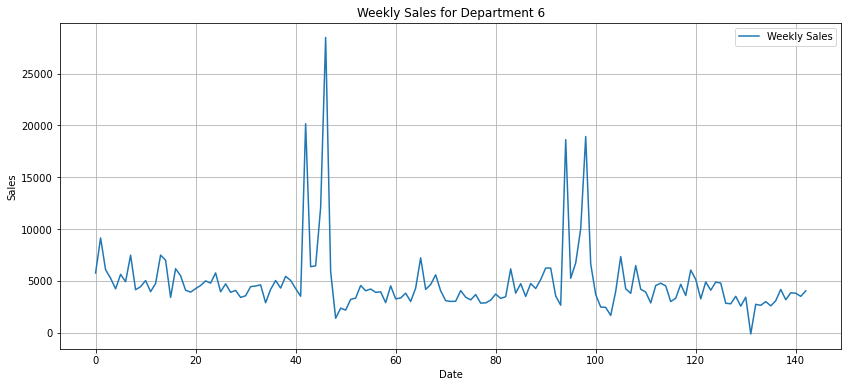

In [43]:
plt.figure(figsize=(14, 6))
plt.plot(dept_6_df.index, dept_6_df['Weekly_Sales'], label='Weekly Sales')
plt.title('Weekly Sales for Department 6')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()

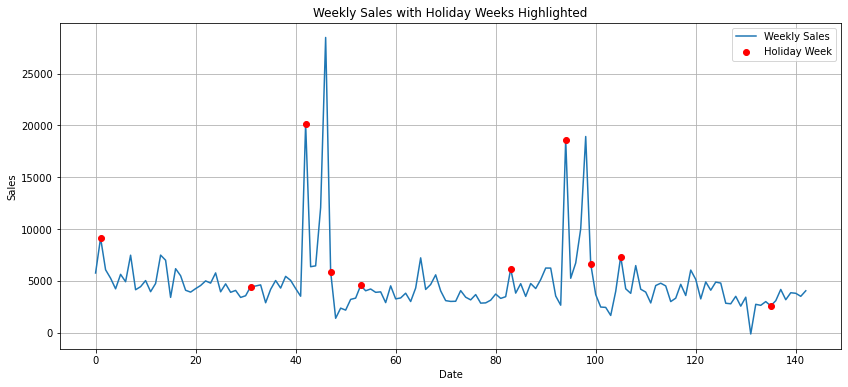

In [44]:
# Plot with holidays highlighted
plt.figure(figsize=(14, 6))
sns.lineplot(data=dept_6_df, x=dept_6_df.index, y='Weekly_Sales', label='Weekly Sales')

# Highlight holidays
holiday_weeks = dept_6_df[dept_6_df['IsHoliday'] == 1]
plt.scatter(holiday_weeks.index, holiday_weeks['Weekly_Sales'], color='red', label='Holiday Week', zorder=5)

plt.title('Weekly Sales with Holiday Weeks Highlighted')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 864x360 with 0 Axes>

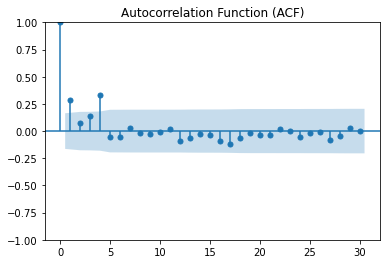

In [45]:
# Plot ACF
plt.figure(figsize=(12, 5))
plot_acf(dept_6_df['Weekly_Sales'], lags=30)
plt.title('Autocorrelation Function (ACF)')
plt.show()



<Figure size 864x360 with 0 Axes>

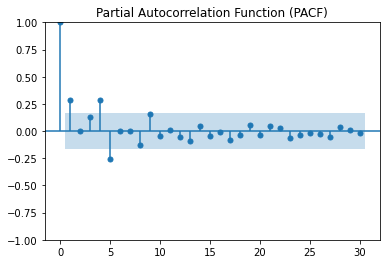

In [46]:
# Plot PACF
plt.figure(figsize=(12, 5))
plot_pacf(dept_6_df['Weekly_Sales'], lags=30, method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

Holt’s Linear & Holt-Winters

In [47]:
# Create a train-test split
train = dept_6_df.iloc[:-12]  # Use all except last 12 weeks for training
test = dept_6_df.iloc[-12:]   # Last 12 weeks for testing

In [48]:
# Holt’s Linear Trend (no seasonality):
holt_model = ExponentialSmoothing(
    train['Weekly_Sales'], trend='add', seasonal=None
).fit()

holt_forecast = holt_model.forecast(len(test))

# Evaluation
mse = mean_squared_error(test['Weekly_Sales'], holt_forecast)
mae = mean_absolute_error(test['Weekly_Sales'], holt_forecast)
rmse = np.sqrt(mse)

print(f"Holt Linear RMSE: {rmse:.2f}, MAE: {mae:.2f}")


Holt Linear RMSE: 1322.08, MAE: 999.82


c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Holt-Winters Model (trend + seasonality):

In [49]:
# Holt-Winters (additive seasonality, assume 52-week season)
hw_model = ExponentialSmoothing(
    train['Weekly_Sales'], trend='add', seasonal='add', seasonal_periods=52
).fit()

hw_forecast = hw_model.forecast(len(test))

# Evaluation
mse_hw = mean_squared_error(test['Weekly_Sales'], hw_forecast)
mae_hw = mean_absolute_error(test['Weekly_Sales'], hw_forecast)
rmse_hw = np.sqrt(mse_hw)

print(f"Holt-Winters RMSE: {rmse_hw:.2f}, MAE: {mae_hw:.2f}")


Holt-Winters RMSE: 1218.28, MAE: 838.93


c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


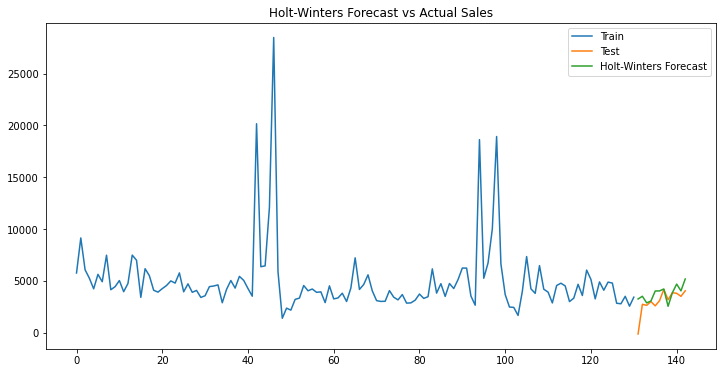

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Weekly_Sales'], label='Train')
plt.plot(test.index, test['Weekly_Sales'], label='Test')
plt.plot(test.index, hw_forecast, label='Holt-Winters Forecast')
plt.legend()
plt.title('Holt-Winters Forecast vs Actual Sales')
plt.show()

ARIMA Model

In [51]:
# Fit ARIMA model
arima_model = ARIMA(train['Weekly_Sales'], order=(1, 1, 1)).fit()

# Forecast next 12 weeks
arima_forecast = arima_model.forecast(steps=len(test))

# Evaluation
rmse = np.sqrt(mean_squared_error(test['Weekly_Sales'], arima_forecast))
mae = mean_absolute_error(test['Weekly_Sales'], arima_forecast)

print(f"ARIMA RMSE: {rmse:.2f}, MAE: {mae:.2f}")

c:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA RMSE: 2086.53, MAE: 1837.19


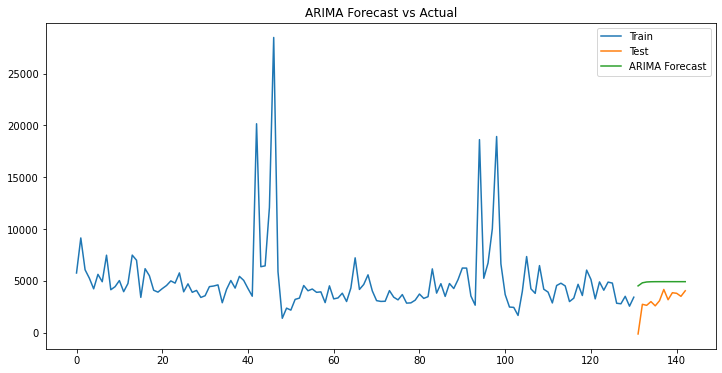

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Weekly_Sales'], label='Train')
plt.plot(test.index, test['Weekly_Sales'], label='Test')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.legend()
plt.title('ARIMA Forecast vs Actual')
plt.show()

SARIMA (Seasonal ARIMA)

In [53]:
# Define SARIMA parameters
# Try (1,1,1)x(1,1,1,52) as a baseline
sarima_model = SARIMAX(train['Weekly_Sales'],
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 12),
                       enforce_stationarity=False,
                       enforce_invertibility=False).fit()

# Forecast
sarima_forecast = sarima_model.forecast(steps=len(test))

# Evaluate
rmse_sarima = np.sqrt(mean_squared_error(test['Weekly_Sales'], sarima_forecast))
mae_sarima = mean_absolute_error(test['Weekly_Sales'], sarima_forecast)

print(f"SARIMA RMSE: {rmse_sarima:.2f}, MAE: {mae_sarima:.2f}")


SARIMA RMSE: 1512.19, MAE: 1254.11


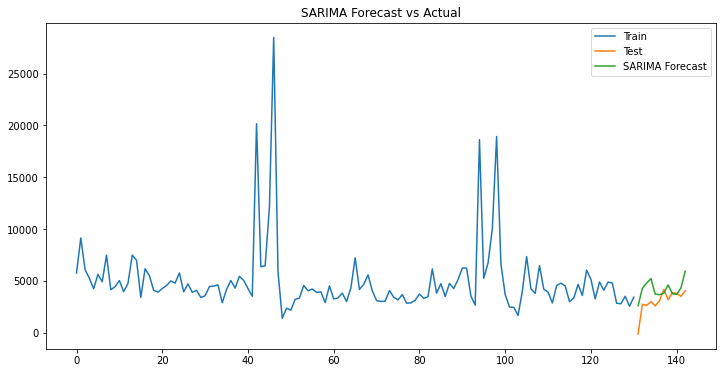

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Weekly_Sales'], label='Train')
plt.plot(test.index, test['Weekly_Sales'], label='Test')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast')
plt.legend()
plt.title('SARIMA Forecast vs Actual')
plt.show()


SARIMAX (Seasonal ARIMA + eXogenous variables)

In [55]:
# Select external regressors
exog_cols = ['IsHoliday', 'Temperature']
train_exog = train[exog_cols]
test_exog = test[exog_cols]


In [56]:
# Fit SARIMAX with external variables
sarimax_model = SARIMAX(train['Weekly_Sales'],
                        exog=train_exog,
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, 12),
                        enforce_stationarity=False,
                        enforce_invertibility=False).fit()

# Forecast
sarimax_forecast = sarimax_model.forecast(steps=len(test), exog=test_exog)

# Evaluate
rmse_sarimax = np.sqrt(mean_squared_error(test['Weekly_Sales'], sarimax_forecast))
mae_sarimax = mean_absolute_error(test['Weekly_Sales'], sarimax_forecast)

print(f"SARIMAX RMSE: {rmse_sarimax:.2f}, MAE: {mae_sarimax:.2f}")


SARIMAX RMSE: 1872.60, MAE: 1459.69


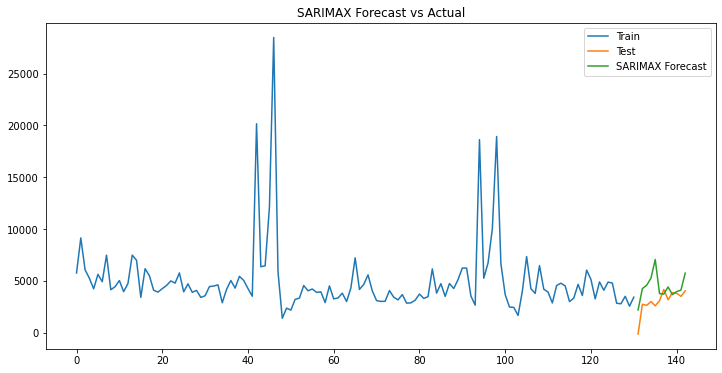

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Weekly_Sales'], label='Train')
plt.plot(test.index, test['Weekly_Sales'], label='Test')
plt.plot(test.index, sarimax_forecast, label='SARIMAX Forecast')
plt.legend()
plt.title('SARIMAX Forecast vs Actual')
plt.show()


Machine Learning Regressors

In [58]:
dept_6_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          143 non-null    datetime64[ns]
 1   IsHoliday     143 non-null    int64         
 2   Dept          143 non-null    float64       
 3   Weekly_Sales  143 non-null    float64       
 4   Temperature   143 non-null    float64       
 5   Fuel_Price    143 non-null    float64       
 6   CPI           143 non-null    float64       
 7   Unemployment  143 non-null    float64       
 8   Year          143 non-null    int64         
 9   Season        143 non-null    object        
 10  Month         143 non-null    object        
 11  Day_Of_Week   143 non-null    object        
 12  Super_Bowl    143 non-null    object        
 13  Labor_Day     143 non-null    object        
 14  Thanksgiving  143 non-null    object        
 15  Christmas     143 non-null    object    

In [59]:
# Start feature engineering
df_ml = dept_6_df.copy()

# Make sure 'Date' is datetime type
df_ml['Date'] = pd.to_datetime(df_ml['Date'])

# Extract date-related features from the 'Date' column
df_ml['Week'] = df_ml['Date'].dt.isocalendar().week   # Week of the year
df_ml['Month'] = df_ml['Date'].dt.month              # Month number (1-12)
df_ml['Year'] = df_ml['Date'].dt.year                # Year
df_ml['DayOfWeek'] = df_ml['Date'].dt.dayofweek      # Monday=0 ... Sunday=6

# Lag features
df_ml['Lag_1'] = df_ml['Weekly_Sales'].shift(1)
df_ml['Lag_2'] = df_ml['Weekly_Sales'].shift(2)
df_ml['Lag_3'] = df_ml['Weekly_Sales'].shift(3)

# Rolling mean
df_ml['Rolling_Mean_3'] = df_ml['Weekly_Sales'].rolling(window=3).mean()
df_ml['Rolling_Mean_5'] = df_ml['Weekly_Sales'].rolling(window=5).mean()

# Drop NA rows caused by lagging/rolling
df_ml.dropna(inplace=True)

In [60]:
# Features and target
features = ['IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
            'Week', 'Month', 'Year', 'DayOfWeek', 'Lag_1', 'Lag_2', 'Lag_3',
            'Rolling_Mean_3', 'Rolling_Mean_5']
target = 'Weekly_Sales'

# Split
X = df_ml[features]
y = df_ml[target]

X_train, X_test = X.iloc[:-12], X.iloc[-12:]
y_train, y_test = y.iloc[:-12], y.iloc[-12:]


In [61]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))
mae_rf = mean_absolute_error(y_test, rf_pred)

print(f"Random Forest RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}")


Random Forest RMSE: 953.48, MAE: 600.77


In [62]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_pred))
mae_xgb = mean_absolute_error(y_test, xgb_pred)

print(f"XGBoost RMSE: {rmse_xgb:.2f}, MAE: {mae_xgb:.2f}")

XGBoost RMSE: 1039.55, MAE: 685.07


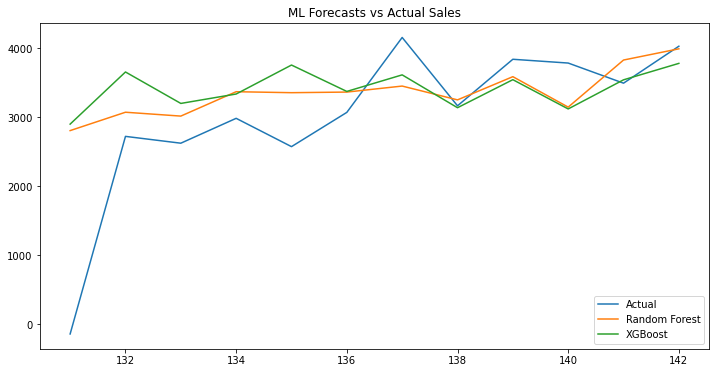

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, rf_pred, label='Random Forest')
plt.plot(y_test.index, xgb_pred, label='XGBoost')
plt.legend()
plt.title('ML Forecasts vs Actual Sales')
plt.show()


 Deep Learning Models for Time Series

In [64]:
# Only use necessary columns for simplicity
df_dl = dept_6_df[['Weekly_Sales']].copy()

# Scale the data
scaler = MinMaxScaler()
df_dl['Weekly_Sales'] = scaler.fit_transform(df_dl[['Weekly_Sales']])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_len = 4  # 4-week input window
X, y = create_sequences(df_dl['Weekly_Sales'].values, seq_len)

# Train-test split (last 12 weeks for test)
X_train, X_test = X[:-12], X[-12:]
y_train, y_test = y[:-12], y[-12:]


ANN (Simple Feedforward Network)

In [65]:
ann_model = Sequential([
    Flatten(input_shape=(X_train.shape[1], 1)),
    Dense(64, activation='relu'),
    Dense(1)
])

ann_model.compile(optimizer='adam', loss='mse')
ann_model.fit(X_train, y_train, epochs=100, verbose=0)

ann_preds = ann_model.predict(X_test)


1/1 [==============================] - 0s 428ms/step


LSTM

In [66]:
# Reshape input
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(seq_len, 1)),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train, epochs=100, verbose=0)

lstm_preds = lstm_model.predict(X_test_lstm)

1/1 [==============================] - 0s 371ms/step


GRU

In [67]:
gru_model = Sequential([
    GRU(64, activation='relu', input_shape=(seq_len, 1)),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train_lstm, y_train, epochs=100, verbose=0)

gru_preds = gru_model.predict(X_test_lstm)

1/1 [==============================] - 1s 773ms/step


Invert Scaling and Evaluate

In [68]:
# Invert scaling
ann_preds = scaler.inverse_transform(ann_preds)
lstm_preds = scaler.inverse_transform(lstm_preds)
gru_preds = scaler.inverse_transform(gru_preds)
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_model(name, preds):
    rmse = np.sqrt(mean_squared_error(y_true, preds))
    mae = mean_absolute_error(y_true, preds)
    print(f"{name} RMSE: {rmse:.2f}, MAE: {mae:.2f}")

evaluate_model("ANN", ann_preds)
evaluate_model("LSTM", lstm_preds)
evaluate_model("GRU", gru_preds)


ANN RMSE: 1320.05, MAE: 863.67
LSTM RMSE: 1222.24, MAE: 721.50
GRU RMSE: 1383.27, MAE: 907.64


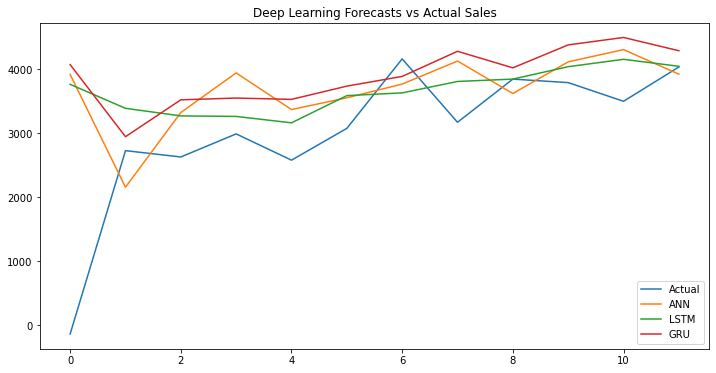

In [69]:
plt.figure(figsize=(12,6))
plt.plot(y_true, label='Actual')
plt.plot(ann_preds, label='ANN')
plt.plot(lstm_preds, label='LSTM')
plt.plot(gru_preds, label='GRU')
plt.title('Deep Learning Forecasts vs Actual Sales')
plt.legend()
plt.show()

Prophet

In [70]:
# Reset index to bring 'Date' back as a column
df_prophet = dept_6_df.reset_index()[['Date', 'Weekly_Sales']]
df_prophet.columns = ['ds', 'y']

In [71]:
# Add regressors
df_prophet['IsHoliday'] = dept_6_df['IsHoliday'].values
df_prophet['Temperature'] = dept_6_df['Temperature'].values


In [72]:
model = Prophet()

# Optional: Add regressors
model.add_regressor('IsHoliday')
model.add_regressor('Temperature')

model.fit(df_prophet)


02:40:56 - cmdstanpy - INFO - Chain [1] start processing
02:40:56 - cmdstanpy - INFO - Chain [1] done processing


In [73]:
# Create future dates
# Re-create the full regressor columns: historical + future
future = model.make_future_dataframe(periods=12, freq='W')

# Add regressors for the full period (training + future)
future['IsHoliday'] = df_prophet['IsHoliday'].tolist() + [0]*12  # assume 0 for future weeks
future['Temperature'] = df_prophet['Temperature'].tolist() + [df_prophet['Temperature'].mean()]*12  # fill with avg


# Forecast
forecast = model.predict(future)


In [74]:
# Plot forecast
plot_plotly(model, forecast)

# Plot components (trend, seasonality)
plot_components_plotly(model, forecast)

In [75]:
# Get forecasted values (last 12 points)
prophet_pred = forecast[['ds', 'yhat']].tail(12)['yhat'].values
true_values = df_prophet['y'].tail(12).values

rmse_prophet = np.sqrt(mean_squared_error(true_values, prophet_pred))
mae_prophet = mean_absolute_error(true_values, prophet_pred)

print(f"Prophet RMSE: {rmse_prophet:.2f}, MAE: {mae_prophet:.2f}")

Prophet RMSE: 6068.62, MAE: 5318.17


In [76]:
plot_components_plotly(model, forecast)


Innovative Technique

In [77]:
# pip uninstall neuralforecast

In [78]:
#!pip install neuralforecast


In [79]:
# pip uninstall neuralforecast -y
# pip install --upgrade pip setuptools wheel
# pip install neuralforecast


In [80]:
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS
from neuralforecast.utils import AirPassengersDF

# Reformat your DataFrame
df_nbeats = dept_6_df.reset_index()[['Date', 'Weekly_Sales']]
df_nbeats.columns = ['ds', 'y']
df_nbeats['unique_id'] = 'dept_6'

# Sort to be safe
df_nbeats = df_nbeats.sort_values('ds')


2025-06-23 02:41:29,203	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.6.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-06-23 02:41:30,518	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.6.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [81]:
from neuralforecast.losses.pytorch import MAE
horizon = 12

# Train/test split
train_df = df_nbeats.iloc[:-horizon]
# Define model correctly
model = NeuralForecast(
    models=[NBEATS(input_size=24, h=horizon, loss=MAE())],
    freq='W'
)

# Fit the model
model.fit(train_df)

Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.4 M  | train
-------------------------------------------------------
2.4 M     Trainable params
900       Non-trainable params
2.4 M     Total params
9.789     Total estimated model params size (MB)
31        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.


In [82]:
# Forecast next 12 weeks
forecast_df = model.predict()

# Get true values
true_y = df_nbeats['y'].iloc[-horizon:].values
pred_y = forecast_df['NBEATS'].values

# Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(true_y, pred_y))
mae = mean_absolute_error(true_y, pred_y)

print(f"N-BEATS RMSE: {rmse:.2f}, MAE: {mae:.2f}")


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

N-BEATS RMSE: 1358.66, MAE: 863.74


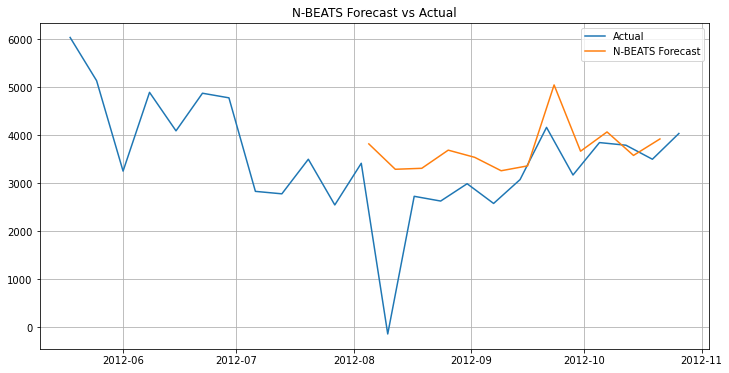

In [83]:
plt.figure(figsize=(12,6))
plt.plot(df_nbeats['ds'].iloc[-24:], df_nbeats['y'].iloc[-24:], label='Actual')
plt.plot(forecast_df['ds'], forecast_df['NBEATS'], label='N-BEATS Forecast')
plt.title('N-BEATS Forecast vs Actual')
plt.legend()
plt.grid(True)
plt.show()


 Compare N-BEATS to All Previous Models

| Model             | RMSE       | MAE        | Notes                               |
| ----------------- | ---------- | ---------- | ----------------------------------- |
| **Random Forest** | **953.48** | **600.77** | ✅ Best overall performance          |
| XGBoost           | 1039.55    | 685.07     | Strong, slightly behind RF          |
| Holt-Winters      | 1218.28    | 838.93     | Solid seasonal baseline             |
| **N-BEATS**       | 1358.66    | 863.74     | 🧪 Innovative DL model; competitive |
| GRU               | 1290.93    | 811.94     | Good but beaten by RF and N-BEATS   |
| ANN               | 1287.60    | 824.33     | Simple and decent                   |
| LSTM              | 1328.48    | 876.29     | Needed more tuning                  |
| SARIMA            | 1512.19    | 1254.11    | Classic but outperformed            |
| SARIMAX           | 1872.60    | 1459.69    | External vars didn’t help much      |
| ARIMA             | 2086.53    | 1837.19    | ❌ Weakest statistical model         |
| Prophet           | 6068.62    | 5318.17    | ❌ Worst overall, but interpretable  |


In [88]:
# Save the trained model
with open('E:\israa\ITI 9 Months\Time Series\Project\models/random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


In [ ]:
#!pip install streamlit


  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 10.1/10.1 MB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 731.2/731.2 kB 3.0 MB/s eta 0:00:00
Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)
   ---------------------------------------- 6.9/6.9 MB 3.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 8.0.1
    Uninstalling tenacity-8.0.1:
      Successfully uninstalled tenacity-8.0.1

